In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import joblib
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestRegressor
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

import warnings
warnings.simplefilter('ignore')

import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

data = pd.read_csv('..\data\PFdata4ML.csv')

X = data.iloc[:,data.columns != "pf_log"]
y = data.iloc[:,data.columns == "pf_log"]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.1,random_state=1163)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
scaler.fit(Xtrain)
scaler.fit(Xtest)
X_train = scaler.transform(Xtrain)
X_test = scaler.transform(Xtest)

error1 = []
error2 = []
error_final = []

(328, 21) (37, 21) (328, 1) (37, 1)


In [2]:
def RF(n_estimator,max_depths,min_samples_split,min_samples_leaf):
    n_estimator = int(n_estimator)
    max_depths = int(max_depths)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    rfg = RandomForestRegressor(n_estimators = n_estimator, random_state=1, max_depth = max_depths)
    rfg.fit(X_train,Ytrain.values.ravel())
    res = rfg.predict(X_test)
    print("Training set score: %f" % rfg.score(X_train,Ytrain))
    print("Test set score: %f" % rfg.score(X_test,Ytest))
    train_error = rfg.score(X_train,Ytrain)
    test_error = rfg.score(X_test,Ytest)
    final_error = 0.9*train_error+0.1*test_error    
#     name = './'+ str(final_error)+'_'+ str(test_error)+'_'+str(train_error) +'rfg.model'
#     joblib.dump(rfg, name)
    error1.append(train_error)
    error2.append(test_error)
    error_final.append(final_error)
    return test_error

In [3]:
pbounds = {'n_estimator': (50, 400),"max_depths":(10,200),"min_samples_split":(2,10),"min_samples_leaf":(1,10)}
optimizer = BayesianOptimization(f=RF,pbounds=pbounds,random_state=1)
bo=optimizer.maximize(init_points=20,n_iter=200)

|   iter    |  target   | max_de... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
Training set score: 0.976758
Test set score: 0.956631
| 1         | 0.9566    | 89.23     | 7.483     | 2.001     | 155.8     |
Training set score: 0.976827
Test set score: 0.956128
| 2         | 0.9561    | 37.88     | 1.831     | 3.49      | 170.9     |
Training set score: 0.976564
Test set score: 0.958264
| 3         | 0.9583    | 85.39     | 5.849     | 5.354     | 289.8     |
Training set score: 0.976623
Test set score: 0.958285
| 4         | 0.9583    | 48.85     | 8.903     | 2.219     | 284.7     |
Training set score: 0.977027
Test set score: 0.955511
| 5         | 0.9555    | 89.29     | 6.028     | 3.123     | 119.3     |
Training set score: 0.976685
Test set score: 0.958279
| 6         | 0.9583    | 162.1     | 9.714     | 4.507     | 292.3     |
Training set score: 0.976516
Test set score: 0.952834
| 7         | 0.9528    | 176.

Training set score: 0.976447
Test set score: 0.959172
| 47        | 0.9592    | 71.05     | 1.434     | 2.239     | 398.7     |
Training set score: 0.976620
Test set score: 0.959299
| 48        | 0.9593    | 104.7     | 9.777     | 9.496     | 379.2     |
Training set score: 0.976580
Test set score: 0.957730
| 49        | 0.9577    | 151.6     | 1.264     | 6.14      | 209.0     |
Training set score: 0.976592
Test set score: 0.958020
| 50        | 0.958     | 101.3     | 9.256     | 2.965     | 327.4     |
Training set score: 0.976774
Test set score: 0.957450
| 51        | 0.9574    | 145.1     | 3.064     | 2.796     | 260.4     |
Training set score: 0.976648
Test set score: 0.958728
| 52        | 0.9587    | 170.8     | 10.0      | 2.0       | 347.3     |
Training set score: 0.976620
Test set score: 0.959299
| 53        | 0.9593    | 155.9     | 7.504     | 2.238     | 379.8     |
Training set score: 0.976308
Test set score: 0.956521
| 54        | 0.9565    | 117.6     | 1.098     | 

Training set score: 0.976525
Test set score: 0.959267
| 94        | 0.9593    | 42.59     | 10.0      | 2.0       | 385.2     |
Training set score: 0.977007
Test set score: 0.955180
| 95        | 0.9552    | 145.7     | 1.064     | 2.656     | 111.1     |
Training set score: 0.976628
Test set score: 0.958762
| 96        | 0.9588    | 200.0     | 1.0       | 2.0       | 348.3     |
Training set score: 0.972558
Test set score: 0.955566
| 97        | 0.9556    | 10.0      | 10.0      | 10.0      | 174.4     |
Training set score: 0.972202
Test set score: 0.957904
| 98        | 0.9579    | 10.81     | 9.203     | 3.026     | 319.2     |
Training set score: 0.976629
Test set score: 0.958290
| 99        | 0.9583    | 174.8     | 1.84      | 2.376     | 271.9     |
Training set score: 0.976663
Test set score: 0.959344
| 100       | 0.9593    | 152.4     | 9.732     | 5.442     | 361.2     |
Training set score: 0.976565
Test set score: 0.958274
| 101       | 0.9583    | 77.37     | 10.0      | 

Training set score: 0.976733
Test set score: 0.957860
| 141       | 0.9579    | 192.8     | 10.0      | 2.0       | 267.2     |
Training set score: 0.976656
Test set score: 0.959400
| 142       | 0.9594    | 191.8     | 10.0      | 2.0       | 369.6     |
Training set score: 0.976713
Test set score: 0.958556
| 143       | 0.9586    | 28.24     | 2.361     | 9.911     | 281.0     |
Training set score: 0.976643
Test set score: 0.958328
| 144       | 0.9583    | 182.0     | 1.0       | 10.0      | 342.2     |
Training set score: 0.976599
Test set score: 0.959263
| 145       | 0.9593    | 186.3     | 1.177     | 9.773     | 372.6     |
Training set score: 0.976590
Test set score: 0.958744
| 146       | 0.9587    | 49.57     | 1.0       | 10.0      | 350.4     |
Training set score: 0.976447
Test set score: 0.959172
| 147       | 0.9592    | 133.6     | 9.766     | 3.545     | 398.5     |
Training set score: 0.976686
Test set score: 0.957739
| 148       | 0.9577    | 32.08     | 1.0       | 

Training set score: 0.972279
Test set score: 0.959059
| 188       | 0.9591    | 10.37     | 1.197     | 9.047     | 399.9     |
Training set score: 0.976430
Test set score: 0.955836
| 189       | 0.9558    | 113.6     | 9.63      | 2.412     | 94.98     |
Training set score: 0.976801
Test set score: 0.957886
| 190       | 0.9579    | 166.9     | 9.219     | 2.295     | 139.3     |
Training set score: 0.971862
Test set score: 0.955134
| 191       | 0.9551    | 10.0      | 10.0      | 2.0       | 95.84     |
Training set score: 0.977066
Test set score: 0.955925
| 192       | 0.9559    | 81.25     | 10.0      | 10.0      | 84.35     |
Training set score: 0.976733
Test set score: 0.958299
| 193       | 0.9583    | 104.6     | 1.0       | 10.0      | 281.7     |
Training set score: 0.976474
Test set score: 0.959493
| 194       | 0.9595    | 16.68     | 9.308     | 4.323     | 393.4     |
Training set score: 0.976749
Test set score: 0.958104
| 195       | 0.9581    | 153.5     | 1.0       | 

In [4]:
rf = joblib.load(r'.\RF.model')

scaler.fit(Xtrain)
scaler.fit(Xtest)
X_train = scaler.transform(Xtrain)
X_test = scaler.transform(Xtest)

In [5]:
# R2
Ytrain_pre = rf.predict(X_train)
print(f'Train_R2_score is {rf.score(X_train,Ytrain.values.ravel()):.2f}')

# RMSE
train_rmse = np.sqrt(mean_squared_error(Ytrain.values.ravel(),Ytrain_pre))
print(f'Train_RMSE is {train_rmse:.3f}')

# MSE
train_mse = mean_squared_error(Ytrain.values.ravel(),Ytrain_pre)
print(f'Train_MSE is {train_mse:.3f}')

# MAE
train_mae = mean_absolute_error(Ytrain.values.ravel(),Ytrain_pre)
print(f'Train_MAE is {train_mae:.3f}')

Train_R2_score is 0.98
Train_RMSE is 0.397
Train_MSE is 0.158
Train_MAE is 0.274


In [6]:
# R2
Ytest_pre = rf.predict(X_test)
print(f'Test_R2_score is {rf.score(X_test,Ytest.values.ravel()):.2f}')

# RMSE
test_rmse = np.sqrt(mean_squared_error(Ytest.values.ravel(),Ytest_pre))
print(f'Test_RMSE is {test_rmse:.3f}')

# MSE
test_mse = mean_squared_error(Ytest.values.ravel(),Ytest_pre)
print(f'Test_MSE is {test_mse:.3f}')

# MAE
test_mae = mean_absolute_error(Ytest.values.ravel(),Ytest_pre)
print(f'Test_MAE is {test_mae:.3f}')

Test_R2_score is 0.96
Test_RMSE is 0.613
Test_MSE is 0.376
Test_MAE is 0.487


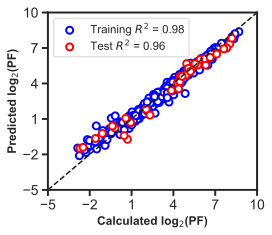

In [8]:
fig, axes = plt.subplots(1, 1, sharey=True, figsize=(4,3.5))
sns.set_style('ticks')

fig1 = sns.scatterplot(x = Ytrain.values.ravel(),
                       y = Ytrain_pre,
                       ec="blue",
                       linewidth = 2,
                       alpha=1,
                       color = 'w',
                       marker='o',
                       s = 50,
                       )

fig2 = sns.scatterplot(x = Ytest.values.ravel(),
                       y = Ytest_pre,
                       ec="red",
                       linewidth = 2,
                       alpha=1,
                       color = 'w',
                       marker='o',
                       s = 50,
                       )

plt.legend(labels=["Training $R^2$ = 0.98","Test $R^2$ = 0.96"],loc="upper left",fontsize=11.5)  

title='Calculated log$_2$(PF)'
title1='Predicted log$_2$(PF)'
plt.xlabel(title,
          fontsize=12,
          fontweight='bold')
plt.ylabel(title1,
          fontsize=12,
          fontweight='bold')

plt.xlim((-5, 10))
plt.ylim((-5, 10))
plt.plot([-5, 10],[-5, 10], color='k', linewidth=1.5, linestyle='--')

my_x_ticks = np.arange(-5, 10.1,3)
my_y_ticks = np.arange(-5, 10.1,3)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=2)
bwith = 2 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)

plt.tight_layout()
plt.show()